In [1]:
import ROOT

import numpy as np
import pickle
import matplotlib.pyplot as plt
from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes


ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

print "ok!"

ok!


In [2]:
# load the dictionary with all trained models
where_models = '/home/micael/MyWorkspace/DATA/NN_outputs'
modelos_comPtRel = pickle.load(open(where_models+'/'+'Estimadores_comPTREL.pkl'))
modelos_semPtRel = pickle.load(open(where_models+'/'+'Estimadores_semPTREL.pkl'))

trn_desc_comPtRel = pickle.load(open(where_models+'/'+'Trn_desc_comPTREL.pkl'))
trn_desc_semPtRel = pickle.load(open(where_models+'/'+'Trn_desc_semPTREL.pkl'))

save_figures = '/home/micael/MyWorkspace/DATA/trabalho_CPE721'

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN not available)


# Plot the error - Models with PtRel

In [46]:
models = np.array([1,2,3,4,5,6,7,8,9,10])
models[1]

2

In [50]:
np.zeros([10])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [64]:
erro_medio_por_modelo = np.zeros([len(trn_desc_comPtRel)])
desvio_por_modelo = np.zeros([len(trn_desc_comPtRel)])

erro_medio_por_modelo_treinamento = np.zeros([len(trn_desc_comPtRel)])
desvio_por_modelo_treinamento = np.zeros([len(trn_desc_comPtRel)])

for imodel in range(len(trn_desc_comPtRel)):
    erro_medio_por_modelo[imodel] = np.mean(trn_desc_comPtRel[imodel].history['val_loss'])
    desvio_por_modelo[imodel]= np.sqrt(np.var(trn_desc_comPtRel[imodel].history['val_loss'],dtype=np.float64),dtype=np.float64)
    
    erro_medio_por_modelo_treinamento[imodel] = np.mean(trn_desc_comPtRel[imodel].history['loss'])
    desvio_por_modelo_treinamento[imodel]= np.sqrt(np.var(trn_desc_comPtRel[imodel].history['loss'],dtype=np.float64),dtype=np.float64)

In [53]:
erro_medio_por_modelo,desvio_por_modelo

(array([ 0.05259514,  0.04379524,  0.05714614,  0.05479537,  0.05402872,
         0.05654211,  0.0547776 ,  0.05633719,  0.05793981,  0.053804  ]),
 array([ 0.00118029,  0.00103195,  0.00112741,  0.00114146,  0.00120101,
         0.00125248,  0.0013162 ,  0.00132551,  0.00121373,  0.00115881]))

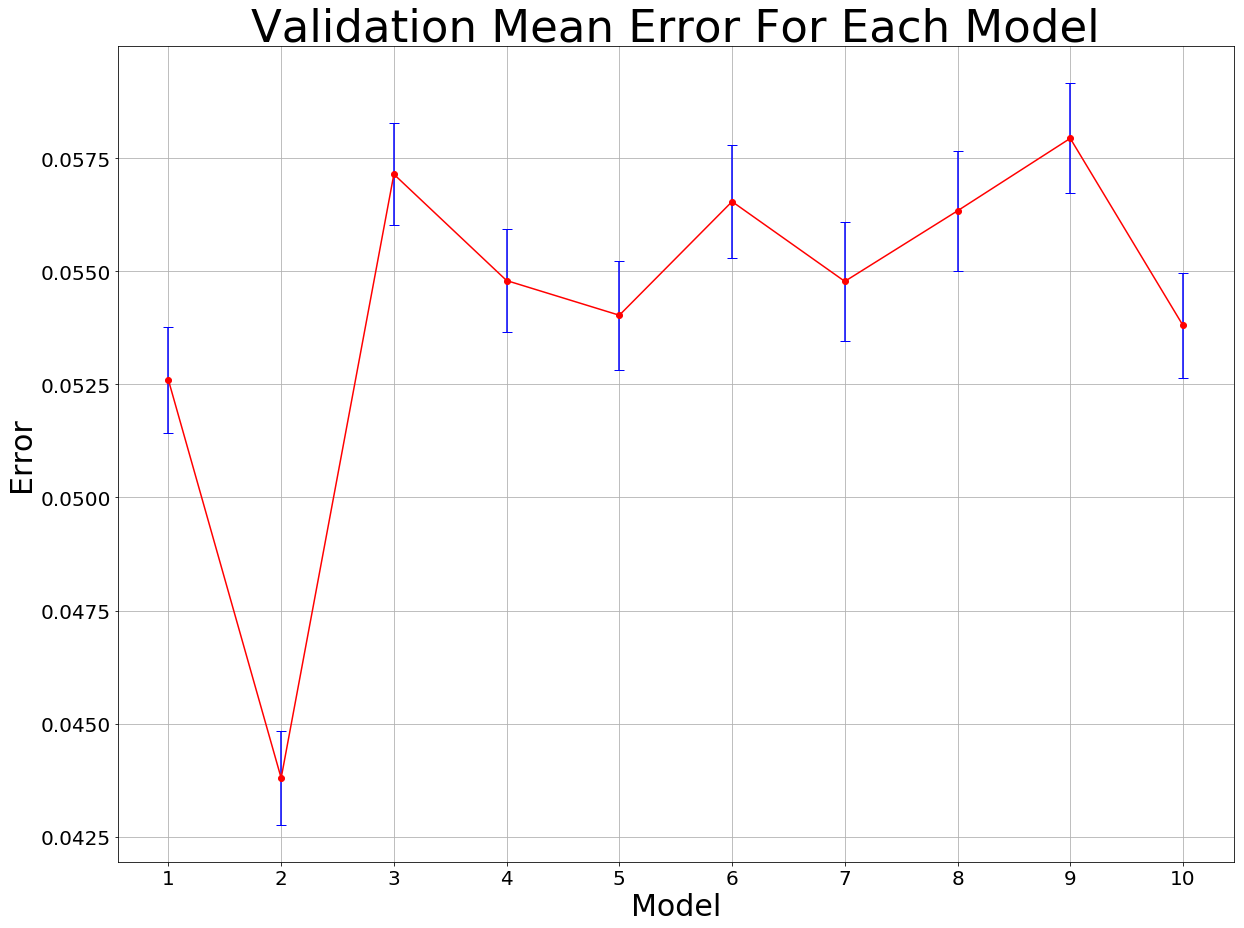

In [75]:
fig, ax = plt.subplots(1,figsize=(20,15))
plt.errorbar(models,erro_medio_por_modelo,yerr=desvio_por_modelo,color='r',ecolor='b',fmt='-o',capsize=5)

plt.title('Validation Mean Error For Each Model',fontsize=45)

plt.ylabel('Error',fontsize=30)
plt.xlabel('Model',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(np.arange(min(models),max(models)+1))

plt.grid()
plt.savefig(save_figures+'/'+'validation_mean_error_10Folds.png')
plt.savefig(save_figures+'/'+'validation_mean_error_10Folds.pdf')
plt.show()  
             

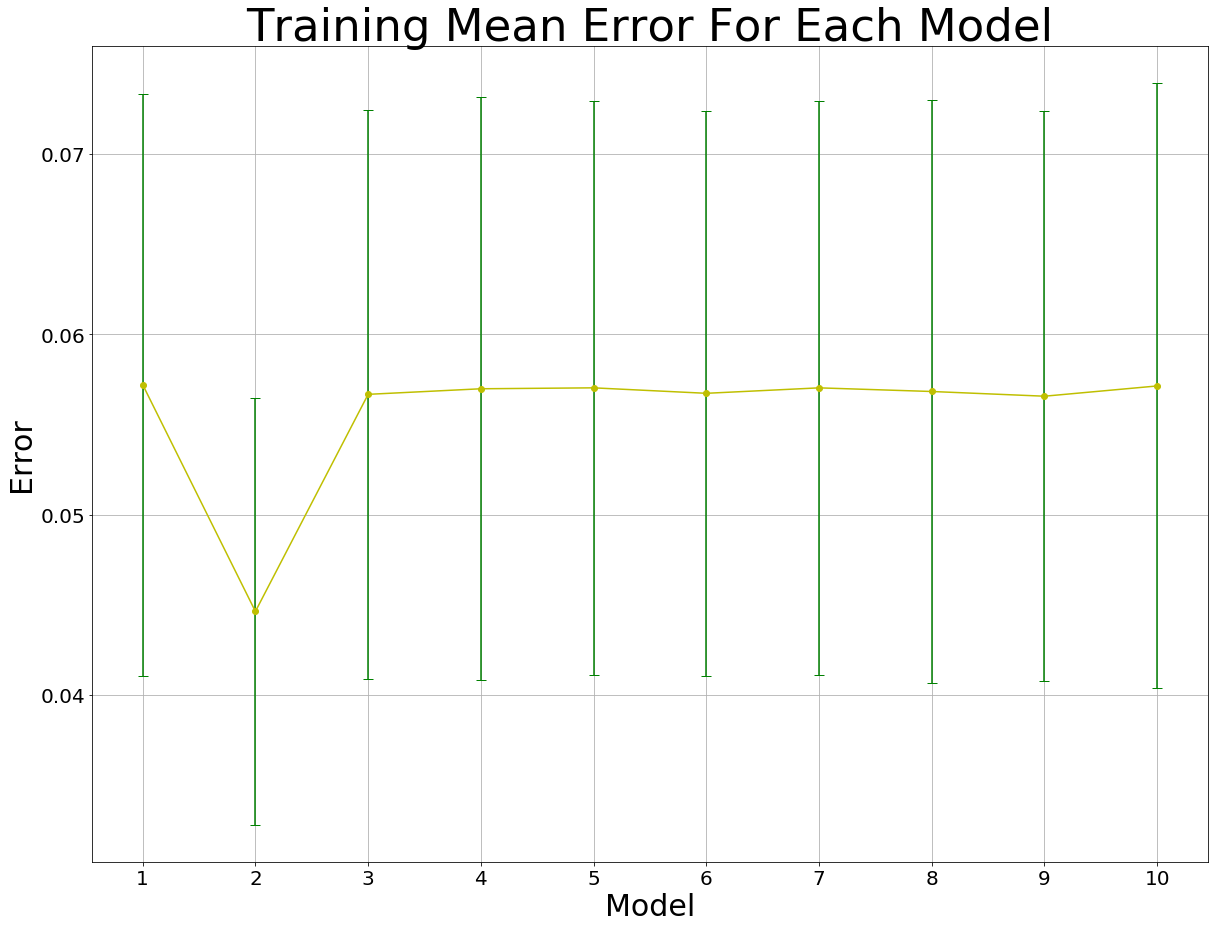

In [74]:
fig, ax = plt.subplots(1,figsize=(20,15))
plt.errorbar(models,erro_medio_por_modelo_treinamento,yerr=desvio_por_modelo_treinamento,color='y',ecolor='g',fmt='-o',capsize=5)

plt.title('Training Mean Error For Each Model',fontsize=45)

plt.ylabel('Error',fontsize=30)
plt.xlabel('Model',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(np.arange(min(models),max(models)+1))

plt.grid()
plt.savefig(save_figures+'/'+'training_mean_error_10Folds.png')
plt.savefig(save_figures+'/'+'training_mean_error_10Folds.pdf')
plt.show()  
           

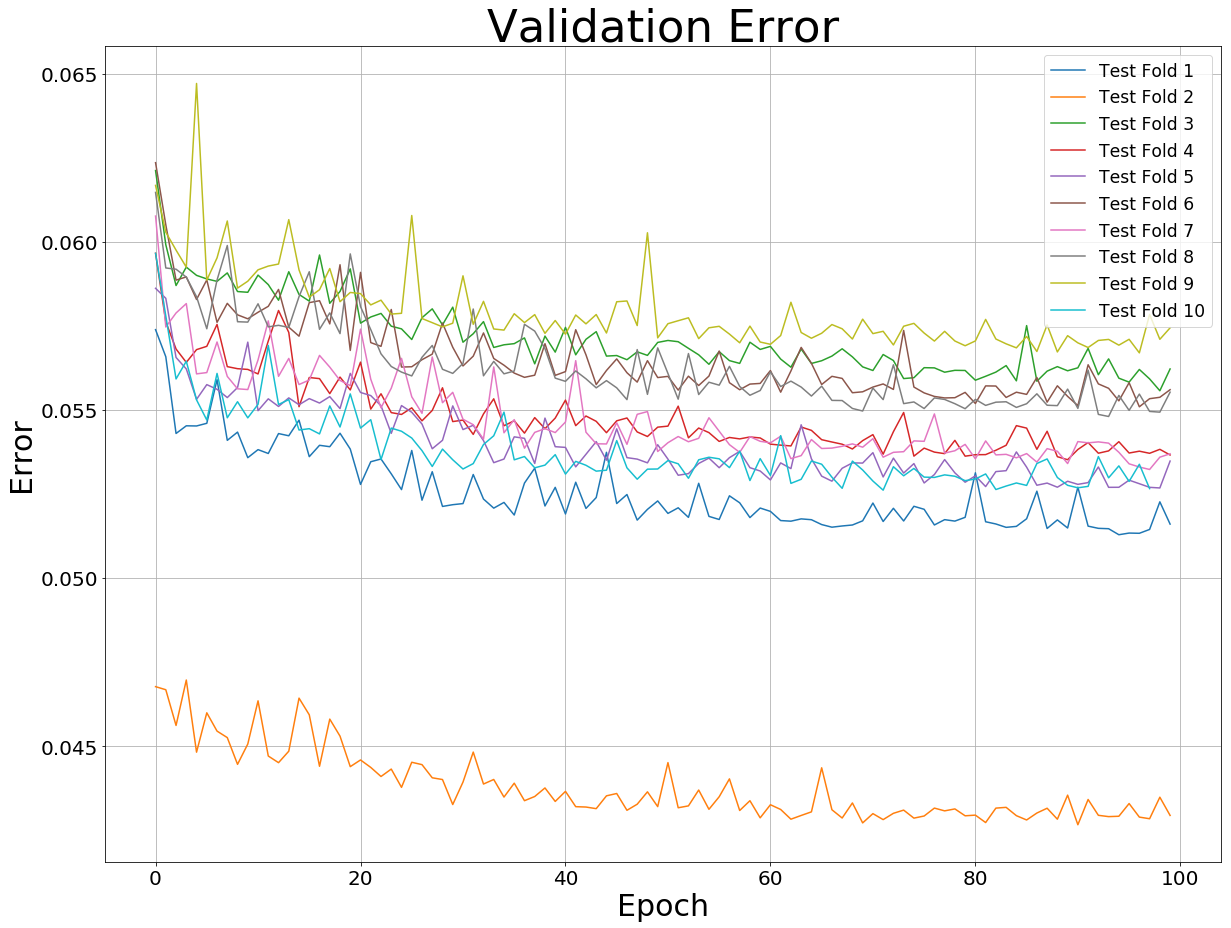

In [8]:
fig, ax = plt.subplots(1,figsize=(20,15))
list_t = []
for i in range(len(trn_desc_comPtRel)):
    plt.plot(trn_desc_comPtRel[i].history['val_loss'])
    list_t.append('Test Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Validation Error',fontsize=45)
plt.ylabel('Error',fontsize=30)
plt.xlabel('Epoch',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
plt.savefig(save_figures+'/'+'validation_error_10Folds.png')
plt.savefig(save_figures+'/'+'validation_error_10Folds.pdf')
plt.show()


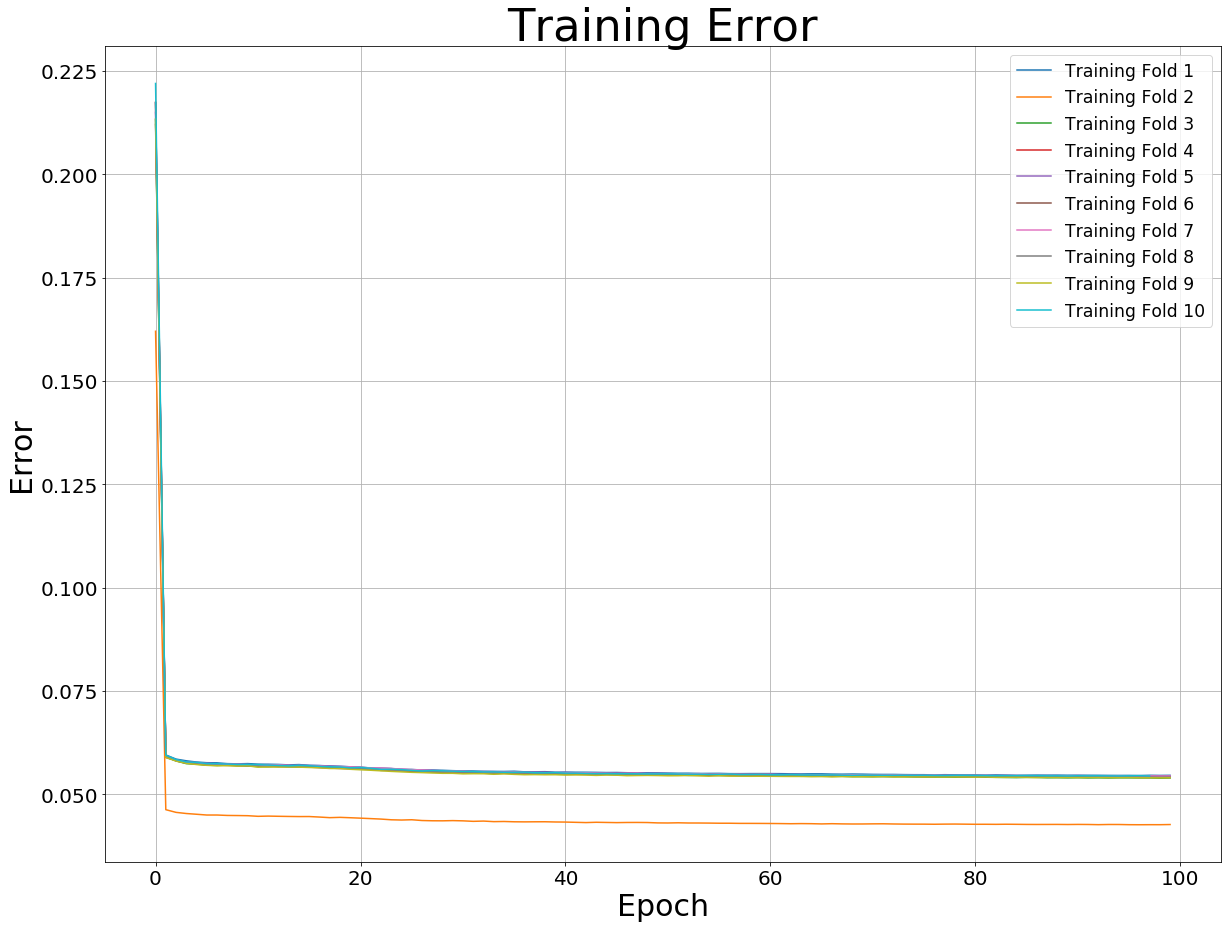

In [66]:
fig, ax = plt.subplots(1,figsize=(20,15))
list_t = []
for i in range(len(trn_desc_comPtRel)):
    plt.plot(trn_desc_comPtRel[i].history['loss'])
    list_t.append('Training Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Training Error',fontsize=45)
plt.ylabel('Error',fontsize=30)
plt.xlabel('Epoch',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
plt.savefig(save_figures+'/'+'training_error_10Folds.png')
plt.savefig(save_figures+'/'+'training_error_10Folds.pdf')
plt.show()

# Plot the error - Models without PtRel

In [67]:
erro_medio_por_modelo_semptrel = np.zeros([len(trn_desc_semPtRel)])
desvio_por_modelo_semptrel = np.zeros([len(trn_desc_semPtRel)])

erro_medio_por_modelo_treinamento_semptrel = np.zeros([len(trn_desc_semPtRel)])
desvio_por_modelo_treinamento_semptrel = np.zeros([len(trn_desc_semPtRel)])

for imodel in range(len(trn_desc_semPtRel)):
    erro_medio_por_modelo_semptrel[imodel] = np.mean(trn_desc_semPtRel[imodel].history['val_loss'])
    desvio_por_modelo_semptrel[imodel]= np.sqrt(np.var(trn_desc_semPtRel[imodel].history['val_loss'],dtype=np.float64),dtype=np.float64)
    
    erro_medio_por_modelo_treinamento_semptrel[imodel] = np.mean(trn_desc_semPtRel[imodel].history['loss'])
    desvio_por_modelo_treinamento_semptrel[imodel]= np.sqrt(np.var(trn_desc_semPtRel[imodel].history['loss'],dtype=np.float64),dtype=np.float64)

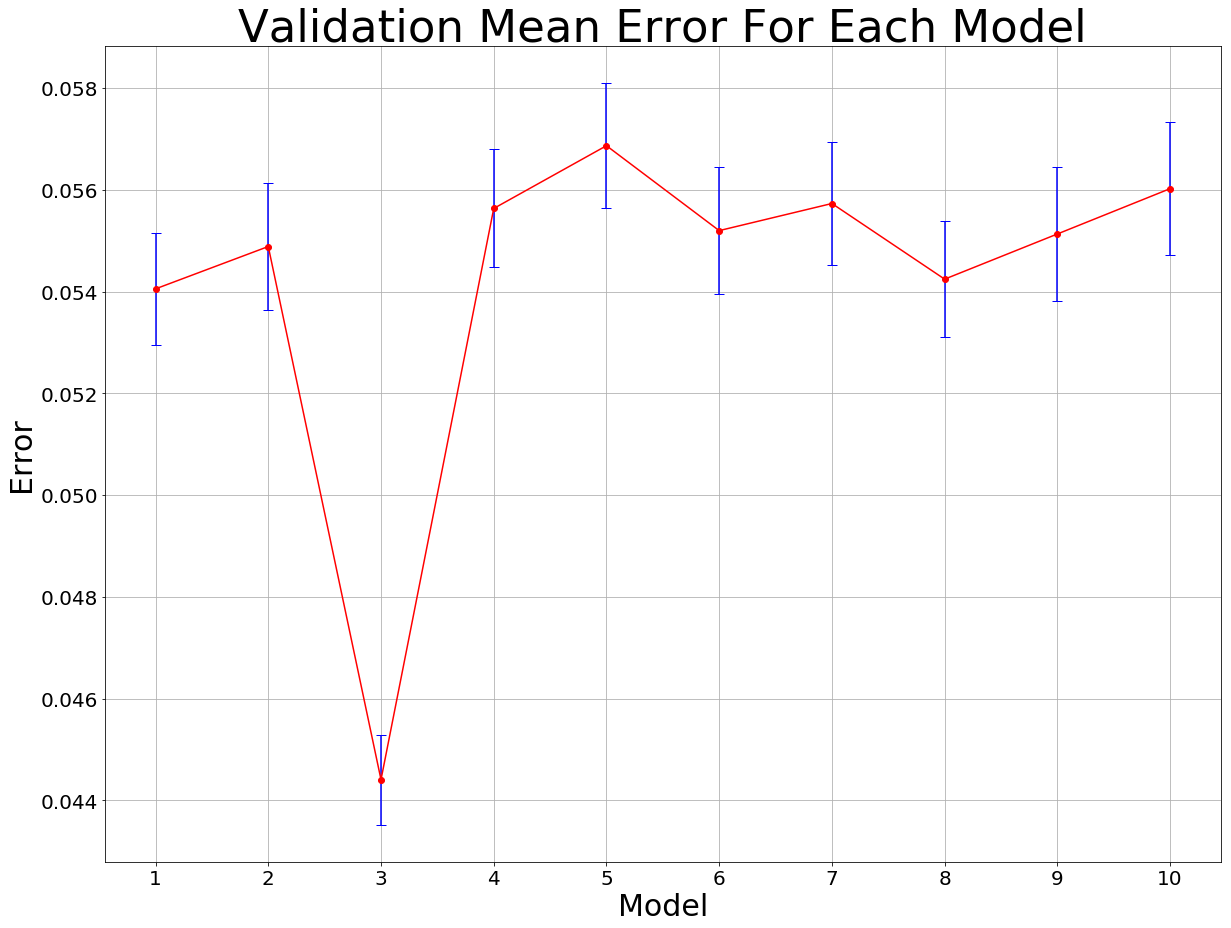

In [73]:
fig, ax = plt.subplots(1,figsize=(20,15))
plt.errorbar(models,erro_medio_por_modelo_semptrel,yerr=desvio_por_modelo_semptrel,color='r',ecolor='b',fmt='-o',capsize=5)

plt.title('Validation Mean Error For Each Model',fontsize=45)

plt.ylabel('Error',fontsize=30)
plt.xlabel('Model',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(np.arange(min(models),max(models)+1))

plt.grid()
plt.savefig(save_figures+'/'+'validation_semptrel_mean_error_10Folds.png')
plt.savefig(save_figures+'/'+'validation_semptrel_mean_error_10Folds.pdf')
plt.show()  
       

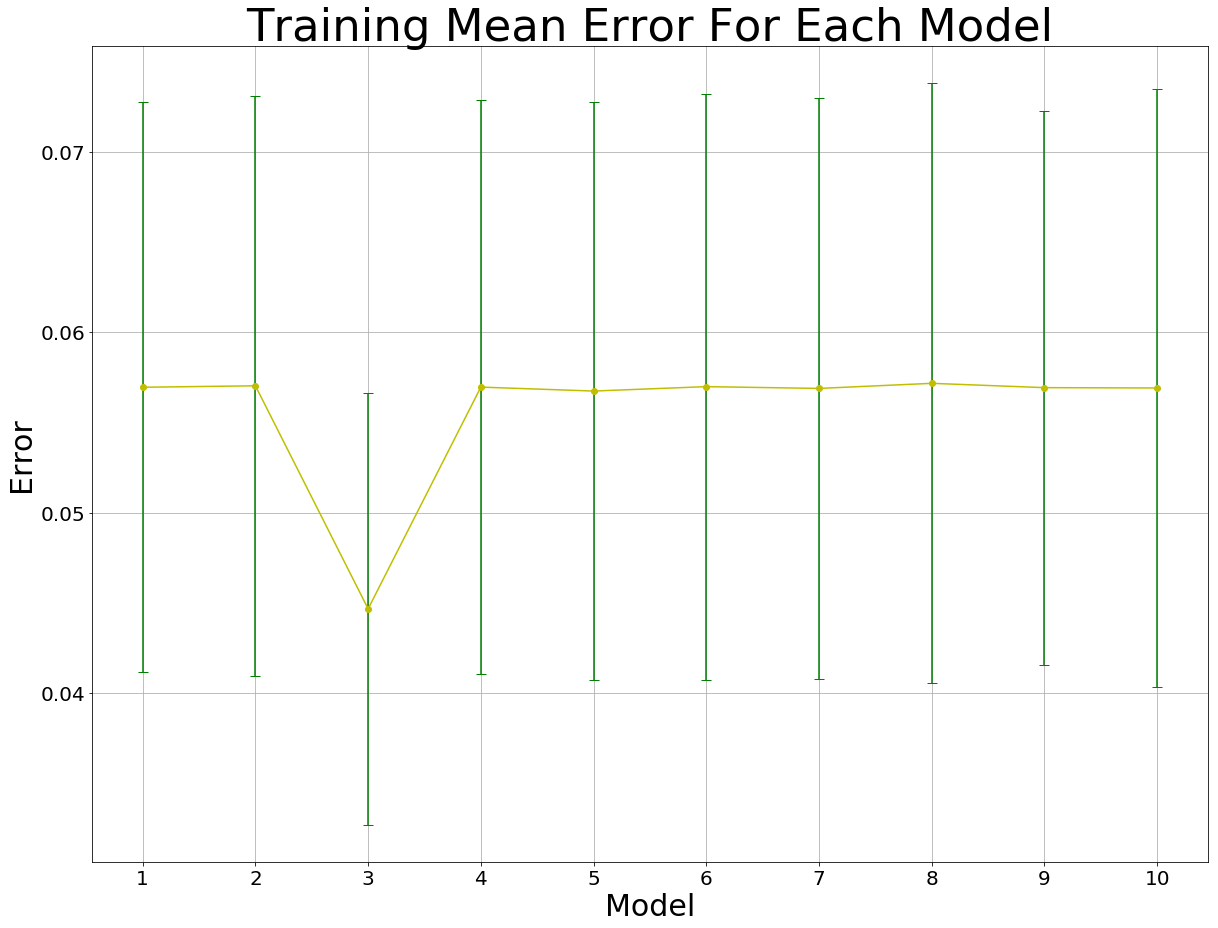

In [76]:
fig, ax = plt.subplots(1,figsize=(20,15))
plt.errorbar(models,erro_medio_por_modelo_treinamento_semptrel,yerr=desvio_por_modelo_treinamento_semptrel,color='y',ecolor='g',fmt='-o',capsize=5)

plt.title('Training Mean Error For Each Model',fontsize=45)

plt.ylabel('Error',fontsize=30)
plt.xlabel('Model',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(np.arange(min(models),max(models)+1))

plt.grid()
plt.savefig(save_figures+'/'+'training_semptrel_mean_error_10Folds.png')
plt.savefig(save_figures+'/'+'training_semptrel_mean_error_10Folds.pdf')
plt.show()  
         

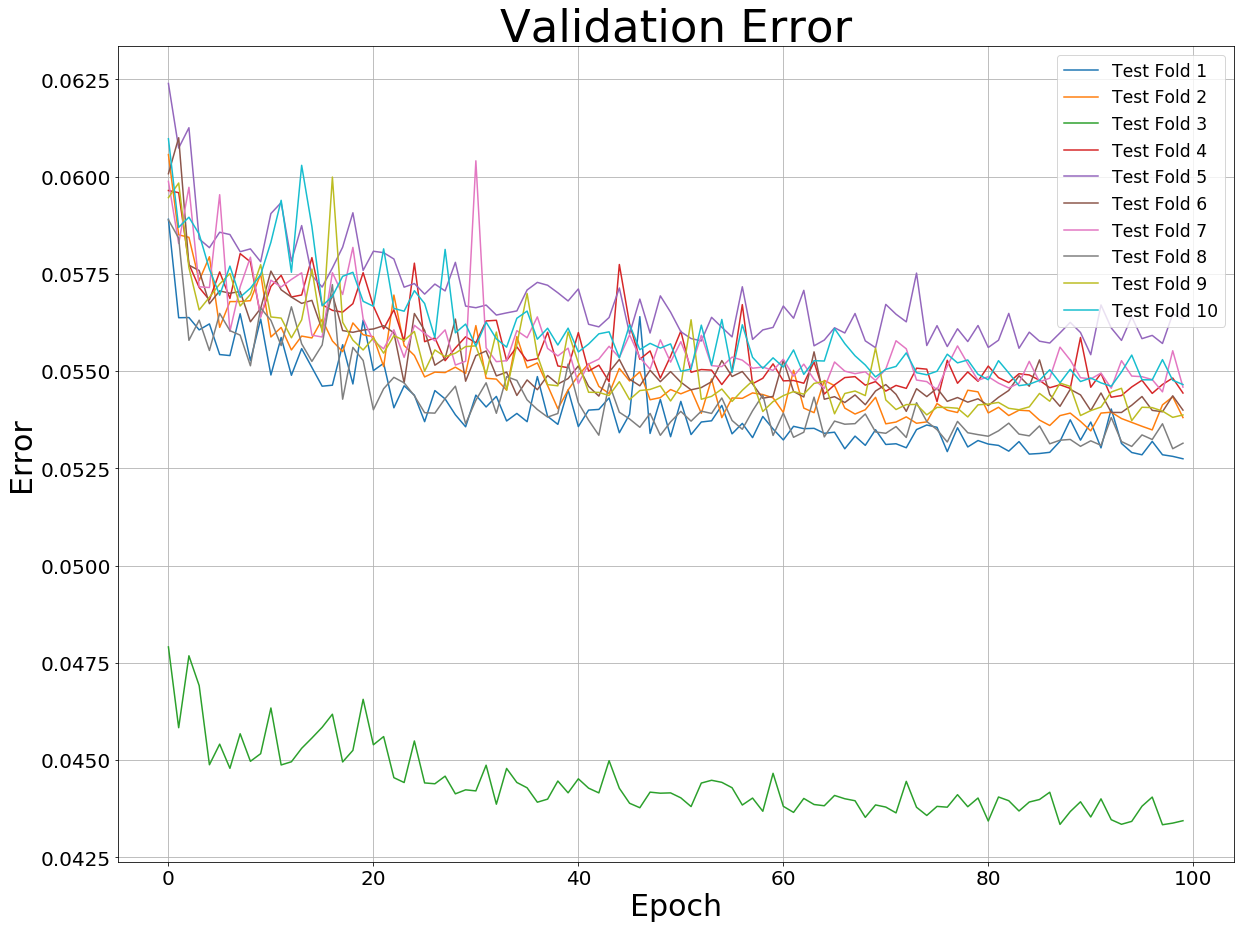

In [77]:
fig, ax = plt.subplots(1,figsize=(20,15))
list_t = []
for i in range(len(trn_desc_semPtRel)):
    plt.plot(trn_desc_semPtRel[i].history['val_loss'])
    list_t.append('Test Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Validation Error',fontsize=45)
plt.ylabel('Error',fontsize=30)
plt.xlabel('Epoch',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
plt.savefig(save_figures+'/'+'validation_semptrel_error_10Folds.png')
plt.savefig(save_figures+'/'+'validation_semptrel_error_10Folds.pdf')
plt.show()

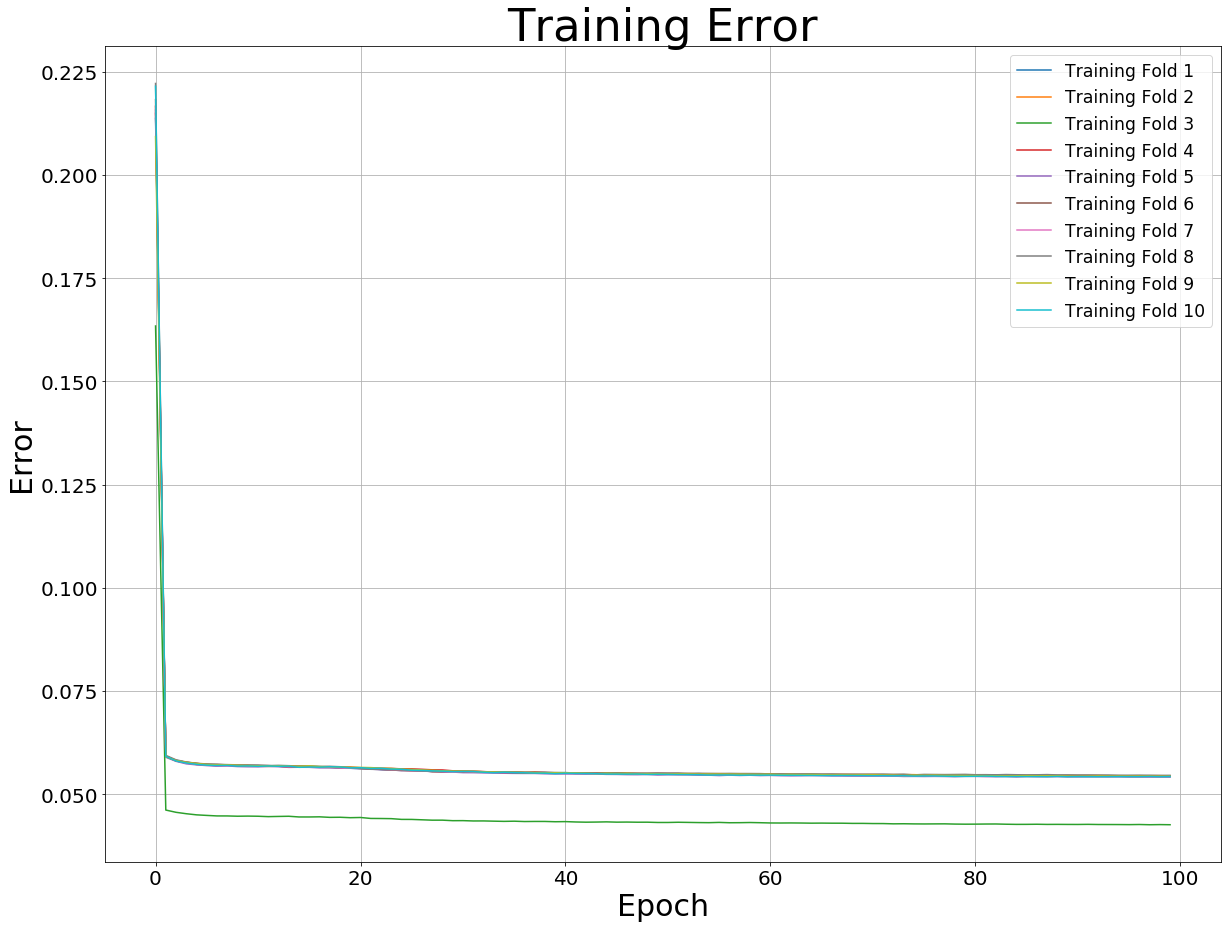

In [78]:
fig, ax = plt.subplots(1,figsize=(20,15))
list_t = []
for i in range(len(trn_desc_semPtRel)):
    plt.plot(trn_desc_semPtRel[i].history['loss'])
    list_t.append('Training Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Training Error',fontsize=45)
plt.ylabel('Error',fontsize=30)
plt.xlabel('Epoch',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
plt.savefig(save_figures+'/'+'training_semptrel_error_10Folds.png')
plt.savefig(save_figures+'/'+'training_semptrel_error_10Folds.pdf')
plt.show()

In [40]:
# Confirm our array shape
path = "/home/micael/MyWorkspace/DATA"
data = np.load(path+"/"+"lvbb125Array.npy")
data_target = data[:,[12]]

print data.shape
data

(191100, 13)


array([[  9.52196307e-03,   6.12077856e-05,   1.65209174e-02, ...,
          9.21870469e+01,   5.98104895e+01,   6.10195977e+01],
       [  1.67018827e-02,   1.13179535e-01,   9.47747454e-02, ...,
          1.07602320e+02,   5.98104895e+01,   6.44654687e+01],
       [  8.95111356e-03,   9.14592529e-05,   8.82276613e-03, ...,
          3.70010500e+02,   4.97765697e+01,   1.06724656e+02],
       ..., 
       [  1.62160210e-02,   5.48769441e-03,   2.28184238e-02, ...,
          3.86259570e+01,   3.57536859e+01,   3.39022539e+01],
       [  1.42509257e-02,   1.21706940e-01,   4.58930284e-02, ...,
          1.07292875e+02,   5.50991584e+01,   9.68779375e+01],
       [  1.58070903e-02,   4.79239076e-02,   1.20003656e-01, ...,
          6.82103906e+01,   5.50991584e+01,   5.35117266e+01]])

In [41]:
from sklearn.model_selection import KFold
from sklearn import preprocessing

n_folds = int(10)
#n_samples =  int(0.1*data_target.shape[0])
n_inits = 5
norm = 'mapstd'

kf = KFold(n_splits=n_folds,shuffle=True)
CVO = list(kf.split(data_target))

# Train information 
#n_folds = 2
#n_inits = 1
#norm = 'mapstd'

train_info = {}
train_info['n_folds'] = n_folds
train_info['n_inits'] = n_inits
train_info['norm'] = norm

trn_desc = {}
estimator = {}

# Isto deve estar dentro do primeiro 'for'. dessa maneira meu conjuto de treino e validação são os mesmo em todos os folds.

MOP_list = []                           
for ifold in range(n_folds):
    train_id, test_id = CVO[ifold]
    
    
    # normalize data based in train set
    if train_info['norm'] == 'mapstd':
        scaler = preprocessing.StandardScaler().fit(data_inputs[train_id,:])
    elif train_info['norm'] == 'mapstd_rob':
        scaler = preprocessing.RobustScaler().fit(data_inputs[train_id,:])
    elif train_info['norm'] == 'mapminmax':
        scaler = preprocessing.MinMaxScaler().fit(data_inputs[train_id,:])
        
    norm_all_data = scaler.transform(data_inputs)
# Normalize the outputs
    [freq, target_values] = np.histogram(data_target[train_id,:],
             bins=np.linspace(data_target[train_id,:].min(),data_target[train_id,:].max(),50))

    MOP = target_values[np.argmax(freq)]
    MOP_list.append(MOP)
    print 'Fold',ifold, 'MOP=', MOP

Fold 0 MOP= 46.6801470424
Fold 1 MOP= 46.6801470424
Fold 2 MOP= 46.6801470424
Fold 3 MOP= 46.6801470424
Fold 4 MOP= 46.6801470424
Fold 5 MOP= 46.6801470424
Fold 6 MOP= 46.6801470424
Fold 7 MOP= 46.6801470424
Fold 8 MOP= 52.6052574936
Fold 9 MOP= 46.7099231306


In [42]:
MOP_list

[46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 52.605257493622446,
 46.709923130580357]

In [29]:
# Confirm our array shape
root_file_path = "/home/micael/MyWorkspace/DATA"
data_input = root_file_path+"/"+"lvbb125.root"
treeName = "perevent"
file = ROOT.TFile(data_input,"READ")
tree = file.Get(treeName)
nrEvents = tree.GetEntries()
print nrEvents

95550


In [45]:
for i in 

In [ ]:
for j in range(len(modelos_comPtRel)):
    for (i,entry) in enumerate(tree):
        if nrEvents>0:
            if i>nrEvents:
                break
            # ==== Trtuh ======== #  
            j1Truth_LV = ROOT.TLorentzVector()
            j2Truth_LV = ROOT.TLorentzVector()
        
            j1Truth_pt = tree.j1_GENWZ_Pt
            j1Truth_phi = tree.j1_GENWZ_Phi
            j1Truth_eta = tree.j1_GENWZ_Eta
            j1Truth_e = tree.j1_GENWZ_E
            
            j2Truth_pt = tree.j2_GENWZ_Pt
            j2Truth_phi = tree.j2_GENWZ_Phi
            j2Truth_eta = tree.j2_GENWZ_Eta
            j2Truth_e = tree.j2_GENWZ_E
            
            j1Truth_LV.SetPtEtaPhiE(j1Truth_pt,j1Truth_eta,j1Truth_phi,j1Truth_e)
            j2Truth_LV.SetPtEtaPhiE(j2Truth_pt,j2Truth_eta,j2Truth_phi,j2Truth_e)
            
            dijetTruth_LV = j1Truth_LV + j2Truth_LV
            MassTruth = dijetTruth_LV.M()
            
            #====== Reco =========
            j1Reco_LV = ROOT.TLorentzVector()
            j2Reco_LV = ROOT.TLorentzVector()
        
            j1_pt = tree.j1_EMJESGSCMu_Pt
            j1_phi = tree.j1_EMJESGSCMu_Phi
            j1_eta = tree.j1_EMJESGSCMu_Eta
            j1_e = tree.j1_EMJESGSCMu_E
            
            j2_pt = tree.j2_EMJESGSCMu_Pt
            j2_phi = tree.j2_EMJESGSCMu_Phi
            j2_eta = tree.j2_EMJESGSCMu_Eta
            j2_e = tree.j2_EMJESGSCMu_E
            
            j1Reco_LV.SetPtEtaPhiE(j1_pt,j1_eta,j1_phi,j1_e)
            j2Reco_LV.SetPtEtaPhiE(j2_pt,j2_eta,j2_phi,j2_e)
            
            dijetReco_LV = j1Reco_LV + j2Reco_LV
            MassReco = dijetReco_LV.M()
        
            #========= NN =========
            
            j1_LV = ROOT.TLorentzVector()
            j2_LV = ROOT.TLorentzVector()
        
            j1_LVnoPtRel = ROOT.TLorentzVector()
            j2_LVnoPtRel = ROOT.TLorentzVector()
            
            #=============================================================================
            #=======================EMJESGSCMu========================================
            # variables for EMJESGSCMu j1.     
        E1_EMJESGSCMu = tree.j1_EMJESGSCMu_E
        Phi1_EMJESGSCMu = tree.j1_EMJESGSCMu_Phi
        Eta1_EMJESGSCMu = tree.j1_EMJESGSCMu_Eta
        Pt1_EMJESGSCMu = tree.j1_EMJESGSCMu_Pt
    
            # variables for EMJESGSCMu j2.     
        E2_EMJESGSCMu = tree.j2_EMJESGSCMu_E
        Phi2_EMJESGSCMu = tree.j2_EMJESGSCMu_Phi
        Eta2_EMJESGSCMu = tree.j2_EMJESGSCMu_Eta
        Pt2_EMJESGSCMu = tree.j2_EMJESGSCMu_Pt
    
            # PtRel in EMJESGSCMu
        Theta1_EMJESGSCMu = AuxiliarFunctions.theta(Eta1_EMJESGSCMu)
        Comp1_EMJESGSCMu = AuxiliarFunctions.Componets(E1_EMJESGSCMu,Eta1_EMJESGSCMu,Phi1_EMJESGSCMu,Theta1_EMJESGSCMu)
        norm1_EMJESGSCMu = AuxiliarFunctions.norm(Comp1_EMJESGSCMu)

        Theta2_EMJESGSCMu = AuxiliarFunctions.theta(Eta2_EMJESGSCMu)
        Comp2_EMJESGSCMu = AuxiliarFunctions.Componets(E2_EMJESGSCMu,Eta2_EMJESGSCMu,Phi2_EMJESGSCMu,Theta2_EMJESGSCMu)
        norm2_EMJESGCMu = AuxiliarFunctions.norm(Comp2_EMJESGSCMu)
    
            # sum of components.
        Comp3_EMJESGSCMu = AuxiliarFunctions.somaComponents(Comp1_EMJESGSCMu,Comp2_EMJESGSCMu)
        norm3_EMJESGSCMu = AuxiliarFunctions.norm(Comp3_EMJESGSCMu)
        numerador1_EMJESGSCMu = AuxiliarFunctions.numerador(Comp1_EMJESGSCMu,Comp3_EMJESGSCMu)    
        angle1_EMJESGSCMu = AuxiliarFunctions.alpha(numerador1_EMJESGSCMu,norm1_EMJESGSCMu,norm3_EMJESGSCMu)
    
            #compute Relative Pt
        PtRel_j1_EMJESGSCMu = AuxiliarFunctions.PtRelative(E1_EMJESGSCMu,angle1_EMJESGSCMu)
    
        j1_FracEM3 = tree.j1_FracEM3
        j1_FracTile0 = tree.j1_FracTile0
        j1_TrkWidth = tree.j1_TrkWidth
        j1_EMF = tree.j1_EMF
        j1_JVF = tree.j1_JVF
        j1_NTrk = tree.j1_NTrk 
        j1_SumPtTrk = tree.j1_SumPtTrk
            # only for EM and j2.
        j2_FracEM3 = tree.j2_FracEM3
        j2_FracTile0 = tree.j2_FracTile0
        j2_TrkWidth = tree.j2_TrkWidth
        j2_EMF = tree.j2_EMF
        j2_JVF = tree.j2_JVF
        j2_NTrk = tree.j2_NTrk 
        j2_SumPtTrk = tree.j2_SumPtTrk
    
        # Create a numpy array with all data and normalize then
        # ========= with PtRel =================
        j1 = np.array([j1_FracEM3, j1_FracTile0, j1_TrkWidth, j1_EMF, j1_JVF, j1_NTrk,
                              j1_SumPtTrk, Pt1_EMJESGSCMu, Eta1_EMJESGSCMu, Phi1_EMJESGSCMu, 
                              E1_EMJESGSCMu, PtRel_j1_EMJESGSCMu])
        
        V_j1 = np.reshape(j1, (1,12))
        norm_j1_data = scaler.transform(V_j1)
            
        j2 = np.array([j2_FracEM3, j2_FracTile0, j2_TrkWidth, j2_EMF, j2_JVF, j2_NTrk,
                             j2_SumPtTrk, Pt2_EMJESGSCMu, Eta2_EMJESGSCMu, Phi2_EMJESGSCMu,
                             E2_EMJESGSCMu, PtRel_j1_EMJESGSCMu])
        
        V_j2 = np.reshape(j2, (1,12))
        norm_j2_data = scaler.transform(V_j2)
        
        # ========= without PtRel ==============
        
        j1noPtRel = np.array([j1_FracEM3, j1_FracTile0, j1_TrkWidth, j1_EMF, j1_JVF, j1_NTrk,
                              j1_SumPtTrk, Pt1_EMJESGSCMu, Eta1_EMJESGSCMu, Phi1_EMJESGSCMu, 
                              E1_EMJESGSCMu])
        
        V_j1noPtRel = np.reshape(j1noPtRel, (1,11))
        norm_j1noPtRel_data = scaler_noPtRel.transform(V_j1noPtRel)
            
        j2noPtRel = np.array([j2_FracEM3, j2_FracTile0, j2_TrkWidth, j2_EMF, j2_JVF, j2_NTrk,
                             j2_SumPtTrk, Pt2_EMJESGSCMu, Eta2_EMJESGSCMu, Phi2_EMJESGSCMu,
                             E2_EMJESGSCMu])
        
        V_j2noPtRel = np.reshape(j2noPtRel, (1,11))
        norm_j2noPtRel_data = scaler_noPtRel.transform(V_j2noPtRel)
        
        # ========= end ==========
        # ========= Predict in two models =======
        Pt1_cor = model.predict(norm_j1_data, batch_size=8, verbose=0)*MOP
        Pt2_cor = model.predict(norm_j2_data, batch_size=8, verbose=0)*MOP
        
        Pt1noPtRel_cor = modelNOPTREL.predict(norm_j1noPtRel_data, batch_size=8, verbose=0)*MOP
        Pt2noPtRel_cor = modelNOPTREL.predict(norm_j2noPtRel_data, batch_size=8, verbose=0)*MOP
        
        # ========== end ==========
        # ========== Set the LorentzVectors ============
        
        j1_LV.SetPtEtaPhiE((Pt1_cor/Pt1_EMJESGSCMu)*Pt1_EMJESGSCMu,
                           Eta1_EMJESGSCMu, Phi1_EMJESGSCMu,(Pt1_cor/Pt1_EMJESGSCMu)*E1_EMJESGSCMu)
        j2_LV.SetPtEtaPhiE((Pt2_cor/Pt2_EMJESGSCMu)*Pt2_EMJESGSCMu,
                           Eta2_EMJESGSCMu, Phi2_EMJESGSCMu,(Pt2_cor/Pt2_EMJESGSCMu)*E2_EMJESGSCMu)
        
        # ========= Withou PtRel =============
        
        j1_LVnoPtRel.SetPtEtaPhiE((Pt1noPtRel_cor/Pt1_EMJESGSCMu)*Pt1_EMJESGSCMu,
                           Eta1_EMJESGSCMu, Phi1_EMJESGSCMu,(Pt1noPtRel_cor/Pt1_EMJESGSCMu)*E1_EMJESGSCMu)
        j2_LVnoPtRel.SetPtEtaPhiE((Pt2noPtRel_cor/Pt2_EMJESGSCMu)*Pt2_EMJESGSCMu,
                           Eta2_EMJESGSCMu, Phi2_EMJESGSCMu,(Pt2noPtRel_cor/Pt2_EMJESGSCMu)*E2_EMJESGSCMu)
        
        # ========= end ===============
        # ========= extract the dijet Mass ==========
        
        dijet_LV = j1_LV + j2_LV
        MassNN = dijet_LV.M()
        
        dijet_LVnoPtRel = j1_LVnoPtRel + j2_LVnoPtRel
        MassNNnoPtRel = dijet_LVnoPtRel.M()
        